<a href="https://colab.research.google.com/github/harshitrajssss/College-Results-Analysis/blob/main/College_Results_Analysis_%26_CGPA_Predictor_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_excel("/content/PERFECT_DATA.xlsx")

In [ ]:
data

,Sr.No,Name,Roll No.,MA101,AP101,AC101,ME101,ME103,SGPA,BRANCH
0,2198,TANISH JAIN,2K21/B3/74,B+,F,A,B,B+,10.00,CH
1,337,KULTAJ SINGH,2K21/A4/67,F,P,P,B+,A,3.80,CO
2,880,SUSHANT,2K21/A18/47,C,B,F,P,B,4.20,EC
3,1063,NANDINI MEENA,2K21/A9/68,P,P,P,B+,P,4.20,IT
4,4,PUNEET ARYA,2K21/A12/47,B,B,A,F,F,4.44,SE
...,...,...,...,...,...,...,...,...,...,...
2412,1861,PRIYANSHU SINHA,2K21/B9/05,O,O,O,O,A+,9.80,CH
2413,395,SUBHAM JHA,2K21/A1/58,O,O,O,O,A+,9.80,CO
2414,1355,PIYUSH KUMAR,2K21/B3/42,O,O,O,O,O,9.90,CH
2415,2153,OM SHAHI,2K21/B15/24,O,O,O,O,O,9.90,ME


<ipython-input-4-85641bad7cb9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failed_counts.index, y=failed_counts.values, palette='Reds')


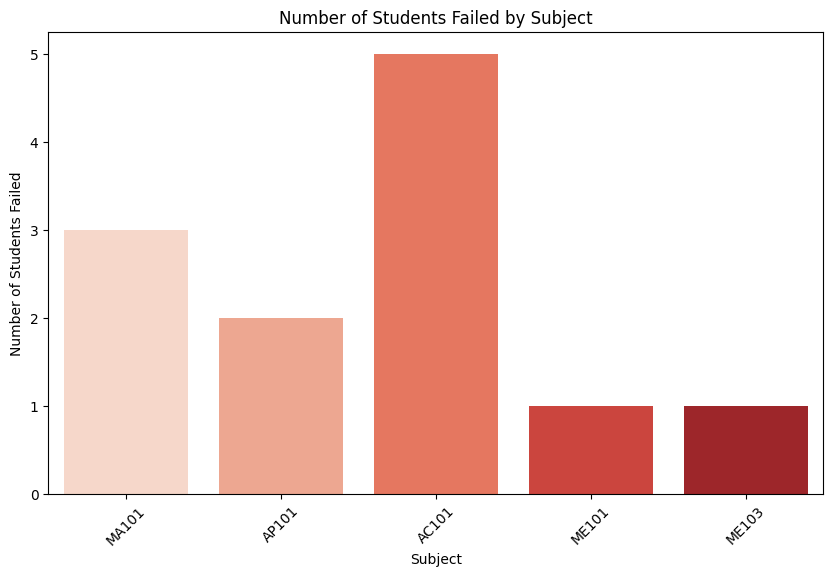

In [ ]:
# Count the number of students who failed in each subject
failed_counts = data[['MA101', 'AP101', 'AC101', 'ME101', 'ME103']].apply(lambda x: (x == 'F').sum())

# Plotting the number of students who failed in each subject
plt.figure(figsize=(10, 6))
sns.barplot(x=failed_counts.index, y=failed_counts.values, palette='Reds')
plt.title('Number of Students Failed by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Students Failed')
plt.xticks(rotation=45)
plt.show()


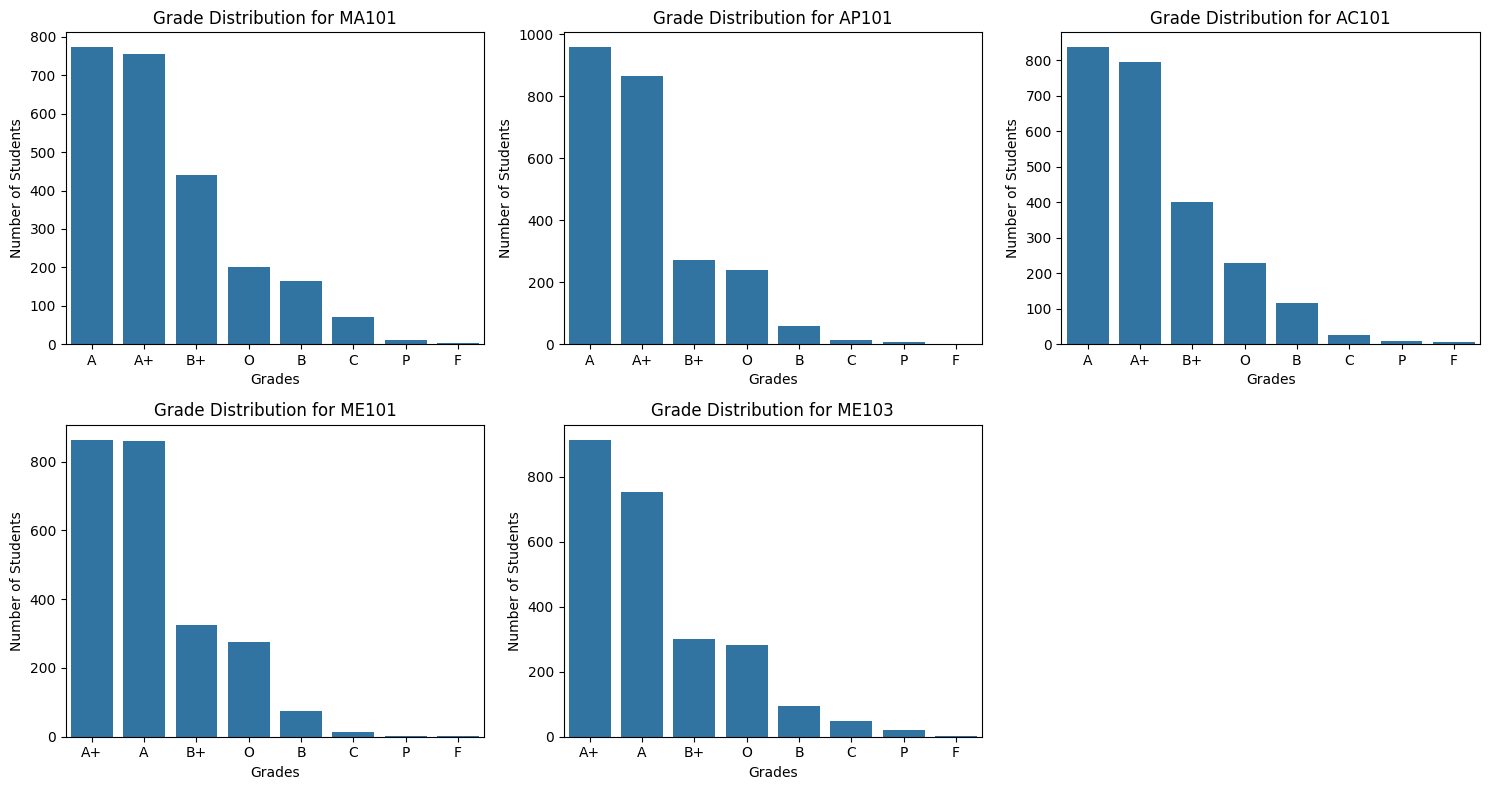

In [ ]:
subjects = ['MA101', 'AP101', 'AC101', 'ME101', 'ME103']

# Plot grade distribution for each subject
plt.figure(figsize=(15, 8))
for i, subject in enumerate(subjects):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=subject, data=data, order=data[subject].value_counts().index)
    plt.title(f'Grade Distribution for {subject}')
    plt.ylabel('Number of Students')
    plt.xlabel('Grades')

plt.tight_layout()
plt.show()

<ipython-input-6-8291e539c6af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pass_rates.index, y=pass_rates.values, palette='viridis')


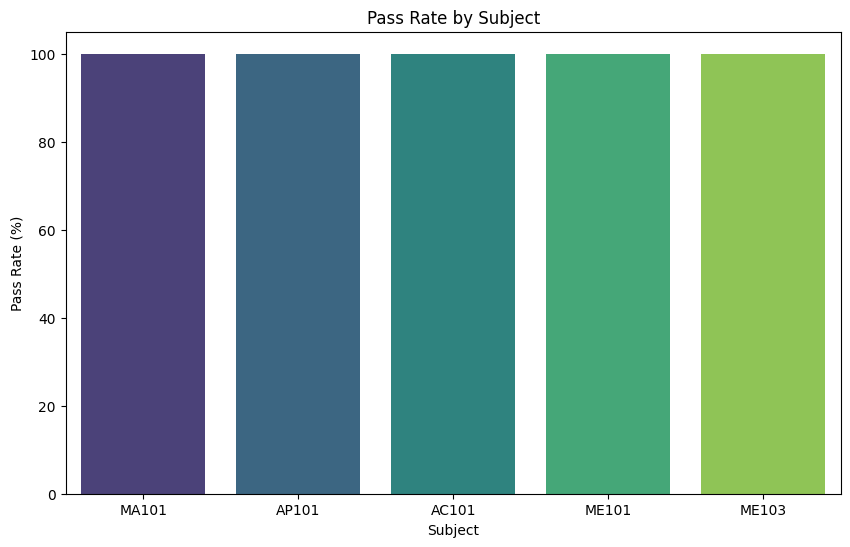

In [ ]:
pass_rates = data[subjects].apply(lambda x: (x != 'F').mean() * 100)

# Plot pass rates
plt.figure(figsize=(10, 6))
sns.barplot(x=pass_rates.index, y=pass_rates.values, palette='viridis')
plt.title('Pass Rate by Subject')
plt.xlabel('Subject')
plt.ylabel('Pass Rate (%)')
plt.show()

<ipython-input-7-ba12086e920c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_avg_sgpa.index, y=branch_avg_sgpa.values, palette='coolwarm')


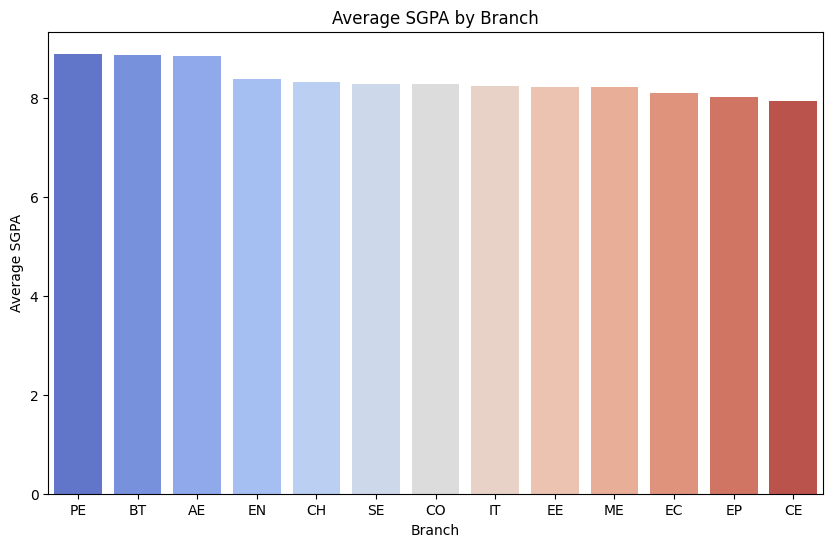

In [ ]:
# Branch-wise average SGPA
branch_avg_sgpa = data.groupby('BRANCH')['SGPA'].mean().sort_values(ascending=False)

# Plotting the branch-wise average SGPA
plt.figure(figsize=(10, 6))
sns.barplot(x=branch_avg_sgpa.index, y=branch_avg_sgpa.values, palette='coolwarm')
plt.title('Average SGPA by Branch')
plt.xlabel('Branch')
plt.ylabel('Average SGPA')
plt.show()


In [ ]:

top_students = data.nlargest(10, 'SGPA')

print("Top 10 Performers:")
print(top_students[['Name', 'SGPA', 'BRANCH']])


Top 10 Performers:
                    Name  SGPA BRANCH
0            TANISH JAIN  10.0     CH
2414        PIYUSH KUMAR   9.9     CH
2415            OM SHAHI   9.9     ME
2416   HEMANT PANCHARIYA   9.9     CO
2407  HIMANSHU CHAUDHARY   9.8     ME
2408     AVNI AMIT KUMAR   9.8     ME
2409      CHESHTA KAPOOR   9.8     CH
2410         SIYA MITTAL   9.8     CH
2411         AYUSH GUPTA   9.8     CH
2412     PRIYANSHU SINHA   9.8     CH


<ipython-input-9-ffda85b08d29>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BRANCH', y='SGPA', data=data, palette='coolwarm')


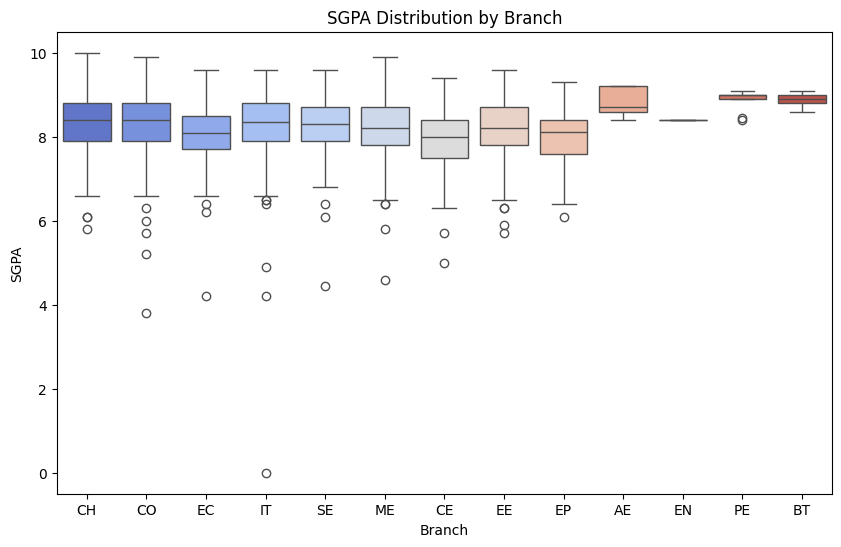

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BRANCH', y='SGPA', data=data, palette='coolwarm')
plt.title('SGPA Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('SGPA')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_excel('PERFECT_DATA.xlsx')

# Updated grade mapping with all possible grades including 'O'
grade_mapping = {'O': 10, 'A+': 9, 'A': 8, 'B+': 7, 'B': 6, 'C': 5, 'P': 4, 'F': 0}

# List of subjects
subjects = ['MA101', 'AP101', 'AC101', 'ME101', 'ME103']

# Convert grades to numerical values using the updated grade mapping
numerical_data = data[subjects].replace(grade_mapping)

# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
numerical_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=subjects)

# Include SGPA in the numerical data
numerical_data['SGPA'] = data['SGPA']

# Prepare training and test data
X = numerical_data[subjects]
y = numerical_data['SGPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to predict SGPA based on grades
def predict_sgpa(grades):
    # Convert grades to numerical values
    grades_numerical = [grade_mapping[grade] for grade in grades]

    # Predict SGPA
    predicted_sgpa = model.predict([grades_numerical])
    return predicted_sgpa[0]

# Example usage of the predictor function
grades = ['A', 'B+', 'A', 'B', 'O']  # Replace with the grades you want to predict for
predicted_sgpa = predict_sgpa(grades)
print(f"Predicted SGPA: {predicted_sgpa:.2f}")


Predicted SGPA: 7.62


<ipython-input-10-776ad44f5205>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_data = data[subjects].replace(grade_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

import pickle
filename = 'sgpa_prediction_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# prompt: make streamlit application for  my cgpa predictor

%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
filename = 'sgpa_prediction_model.sav'
model = pickle.load(open(filename, 'rb'))

# Grade mapping
grade_mapping = {'O': 10, 'A+': 9, 'A': 8, 'B+': 7, 'B': 6, 'C': 5, 'P': 4, 'F': 0}

# Function to predict SGPA based on grades
def predict_sgpa(grades):
    grades_numerical = [grade_mapping[grade] for grade in grades]
    predicted_sgpa = model.predict([grades_numerical])
    return predicted_sgpa[0]


# Streamlit app
st.title("CGPA Predictor")

st.markdown("Enter your grades for each subject to get a predicted CGPA:")

ma101_grade = st.selectbox("MA101:", list(grade_mapping.keys()))
ap101_grade = st.selectbox("AP101:", list(grade_mapping.keys()))
ac101_grade = st.selectbox("AC101:", list(grade_mapping.keys()))
me101_grade = st.selectbox("ME101:", list(grade_mapping.keys()))
me103_grade = st.selectbox("ME103:", list(grade_mapping.keys()))

if st.button("Predict CGPA"):
    grades = [ma101_grade, ap101_grade, ac101_grade, me101_grade, me103_grade]
    predicted_cgpa = predict_sgpa(grades)
    st.success(f"Your predicted CGPA is: {predicted_cgpa:.2f}")

# Add some information about the predictor
st.markdown("""
This CGPA predictor is based on a linear regression model trained on historical student data.
Please note that this is just a prediction, and your actual CGPA may vary.
""")

Writing app.py


In [ ]:
!pip install streamlit-option-menu==0.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.3/785.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.1 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.125.47.43


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.21.80:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y) y
your url is: https://cruel-flowers-see.loca.lt
